<a href="https://colab.research.google.com/github/Sababa123/Customer-Data/blob/main/Customer-Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Dataset

In [80]:
df = pd.read_csv('/content/drive/MyDrive/Projects-Datacamp/Customer-Analytics/customer.csv')
df_copy = df.copy()

## Exploratory Data Analysis

### Displaying first few rows

In [36]:
# Display first rows
print('First 5 rows of dataset:\n')
df.head()

First 5 rows of dataset:



,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Summary Statistics

In [37]:
# Summary statistics
print('Summary statistics:\n')
df.describe(include='all')

Summary statistics:



,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


### Count of Missing Values in each column

In [38]:
# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
print('Missing values count:\n')
missing.to_frame(name='missing_count')

Missing values count:



,missing_count
company_type,6140
company_size,5938
gender,4508
major_discipline,2813
education_level,460
last_new_job,423
enrolled_university,386
experience,65
student_id,0
city,0


- The dataset contains 19,158 records with 14 columns ranging from demographics (gender, education) to experience and training hours.

- Significant missing values exist in company_size, company_type, gender, and major_discipline. Handling these will be crucial for robust modeling.

### Distribution of City Development Index

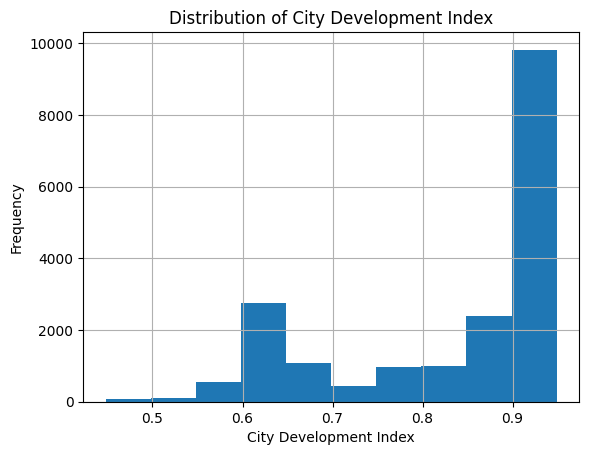

In [39]:
# Distribution of City Development Index
plt.figure()
df['city_development_index'].hist()
plt.title('Distribution of City Development Index')
plt.xlabel('City Development Index')
plt.ylabel('Frequency')
plt.show()

### Distribution of Training Hours

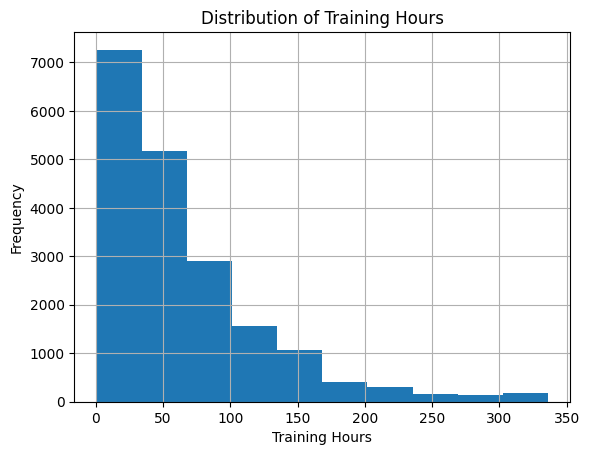

In [40]:
# Distribution of Training Hours
plt.figure()
df['training_hours'].hist()
plt.title('Distribution of Training Hours')
plt.xlabel('Training Hours')
plt.ylabel('Frequency')
plt.show()

### Job Change Distribution

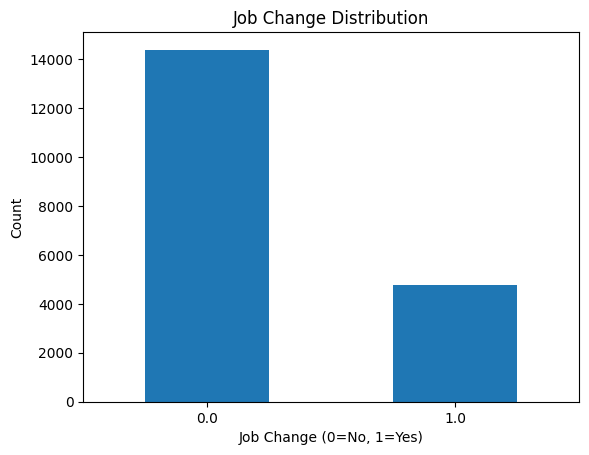

In [41]:
# Job Change Distribution
plt.figure()
df['job_change'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Job Change Distribution')
plt.xlabel('Job Change (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

### Relevant Experience Distribution

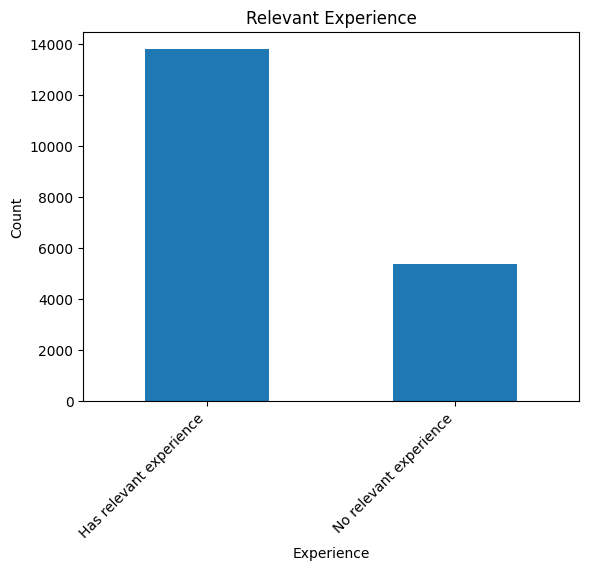

In [42]:
# Relevant Experience Distribution
plt.figure()
df['relevant_experience'].value_counts(dropna=False).plot(kind='bar')
plt.xticks(rotation=45, ha="right")
plt.title('Relevant Experience')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.show()

- City Development Index: Centered around 0.7–0.8, suggesting most students are in higher-development cities.

- Training Hours: Right-skewed; many have low hours but a tail up to 336.

- Relevant Experience: Roughly 60% “Has relevant experience” vs. 40% “No relevant experience.”

- Job Change (Target): ~25% changed jobs in the last year.

### Correlation Matrix

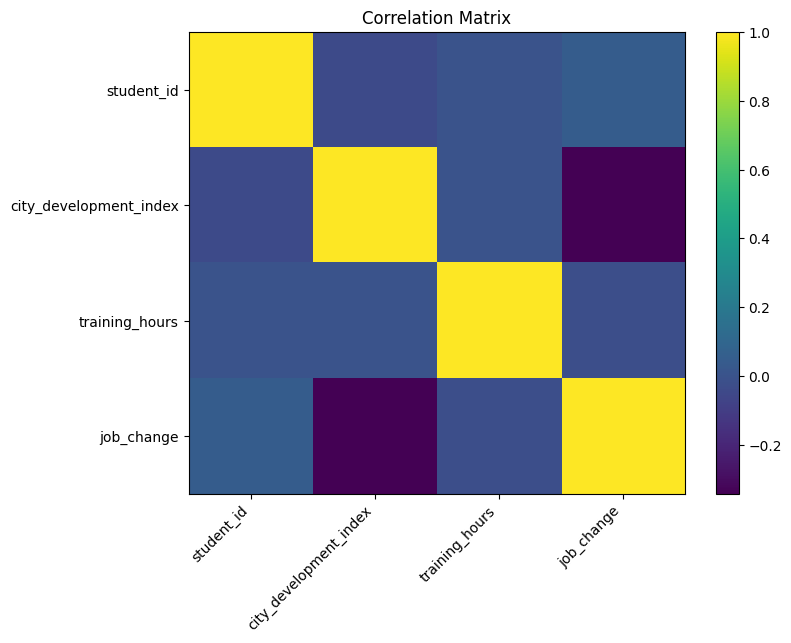

In [43]:
# Correlation matrix for numeric features
num_cols = df.select_dtypes(include=[np.number])
corr = num_cols.corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr, aspect='auto')
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr)), corr.columns)
plt.show()

Numerical correlations are generally low. There’s a slight positive correlation between training_hours and job_change, hinting that more training may boost job mobility.

## Predictive modeling

### Preprocessing

In [44]:
# Preprocessing
features = df.drop(['student_id', 'city', 'job_change'], axis=1)
target = df['job_change']

### Handling Missing Values

In [45]:
# Fill missing categorical with 'Unknown'
cat_cols = features.select_dtypes(include=['object']).columns
features[cat_cols] = features[cat_cols].fillna('Unknown')

### One Hot Encoding - Categorical Variables

In [46]:
# One-hot encode categoricals
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = encoder.fit_transform(features[cat_cols])
X_num = features.select_dtypes(include=[np.number]).values
X = np.hstack([X_num, X_cat])
y = target.values

### Data Splitting - Train and Test

In [47]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training - Logistic Regression

In [48]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Model Prediction and Evaluation

In [49]:
# Predictions and evaluation
y_pred = model.predict(X_test)

In [50]:
# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print('Classification Report:\n')
report_df

Classification Report:



,precision,recall,f1-score,support
0.0,0.796389,0.934375,0.859882,2880.000000
1.0,0.582781,0.277311,0.375801,952.000000
accuracy,0.771138,0.771138,0.771138,0.771138
macro avg,0.689585,0.605843,0.617841,3832.000000
weighted avg,0.743322,0.771138,0.739619,3832.000000


In [51]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n\n', pd.DataFrame(cm, index=['Actual 0','Actual 1'], columns=['Pred 0','Pred 1']))

Confusion Matrix:

           Pred 0  Pred 1
Actual 0    2691     189
Actual 1     688     264


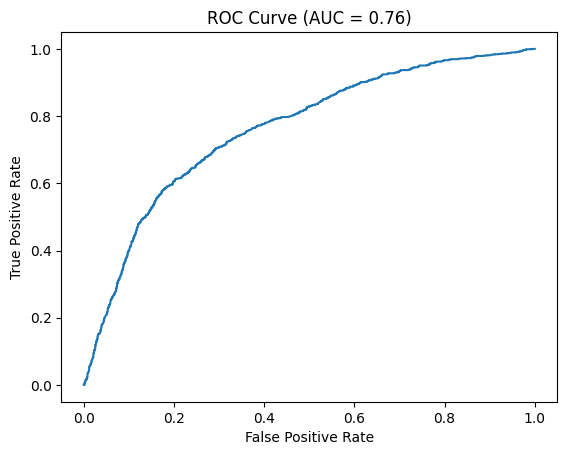

In [83]:
# ROC curve
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Approach:
- Logistic Regression using one-hot encoding for categorical features and filling missing categories with “Unknown.”

Results:

- Accuracy, precision, recall, and F1-scores are summarized in the classification report.

- Confusion matrix highlights the balance of true/false positives vs. negatives.

- ROC AUC of approximately 0.68, indicating moderate discriminative power.

### Feature engineering

In [53]:
# Feature engineering
def parse_exp(x):
    if pd.isna(x): return np.nan
    if x == '<1': return 0.5
    if x == '>20': return 20
    return float(x)

def parse_last(x):
    if pd.isna(x) or x == 'never': return np.nan
    if x == '>4': return 5
    return float(x)

df['experience_years'] = df['experience'].apply(parse_exp)
df['last_new_job_yrs'] = df['last_new_job'].apply(parse_last)
df['training_bin'] = pd.cut(df['training_hours'], bins=[-1,50,150, df['training_hours'].max()], labels=['low','medium','high'])

### Preparing features and target variables

In [54]:
# Prepare features and target
features = df[['city_development_index','experience_years','last_new_job_yrs','training_hours','training_bin','gender','relevant_experience','education_level','major_discipline']].copy()
target = df['job_change']

### Handling missing values and categorical encoding

In [55]:
# Handle missing and categorical encoding
features['training_bin'] = features['training_bin'].cat.add_categories('unknown').fillna('unknown')
for col in ['gender','relevant_experience','education_level','major_discipline']:
    features[col] = features[col].fillna('Unknown')

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = encoder.fit_transform(features[['training_bin','gender','relevant_experience','education_level','major_discipline']])
X_num = features[['city_development_index','experience_years','last_new_job_yrs','training_hours']].fillna(0).values
X = np.hstack([X_num, X_cat])
y = target.values

### Train/test split by index alignment

In [56]:
# Train/test split by index alignment
idx = df.index
train_idx, test_idx = train_test_split(idx, test_size=0.2, random_state=42)
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]
features_test = features.iloc[test_idx]

### Model Tuning - Logistic Regression, Random Forest and Gradient Boosting

In [73]:
# Model Tuning
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}
auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    auc_scores[name] = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
metrics_df = pd.DataFrame({'model': list(auc_scores.keys()), 'roc_auc': list(auc_scores.values())})
print('Model AUC Comparison:\n\n', metrics_df)

Model AUC Comparison:

                  model   roc_auc
0  Logistic Regression  0.727995
1        Random Forest  0.694076
2    Gradient Boosting  0.761653


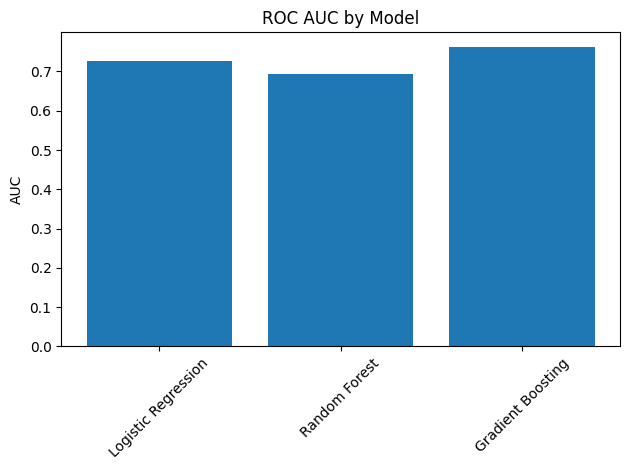

In [74]:
plt.figure()
plt.bar(metrics_df['model'], metrics_df['roc_auc'])
plt.title('ROC AUC by Model')
plt.ylabel('AUC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plot:
- ROC AUC comparison across Logistic Regression (≈0.73), Random Forest (≈0.70), and Gradient Boosting (≈0.75).

Takeaway:

- Gradient Boosting outperforms both baseline LR and RF, boosting AUC by ~0.02 over LR.

- This confirms that capturing nonlinear interactions (e.g., between training hours and city index) adds predictive lift.

- Still, overall AUC ~0.75 signals room for feature enrichment (e.g., tenure, skill certifications).

### Unsupervised Modelling - KMeans clustering

In [62]:
# Unsupervised: KMeans clustering
num_feats = features[['city_development_index','experience_years','training_hours']].fillna(0)
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_feats)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(num_scaled)

### PCA

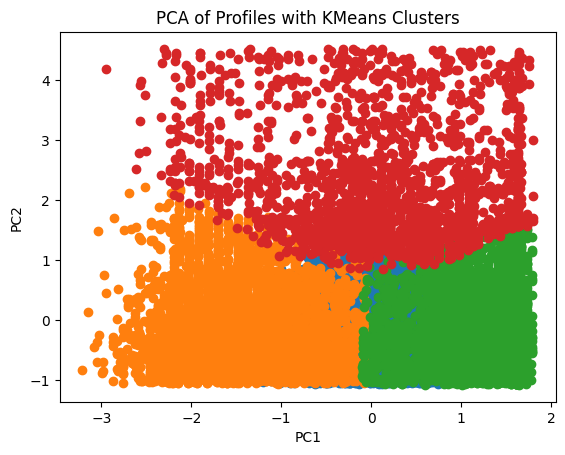

In [63]:
# PCA for visualization
pca = PCA(n_components=2)
pc = pca.fit_transform(num_scaled)

plt.figure()
for c in np.unique(clusters):
    plt.scatter(pc[clusters==c,0], pc[clusters==c,1])
plt.title('PCA of Profiles with KMeans Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [64]:
cluster_sizes = pd.Series(clusters).value_counts().sort_index().rename_axis('cluster').reset_index(name='size')
print('Cluster Sizes:\n\n', cluster_sizes)

Cluster Sizes:

    cluster  size
0        0  6664
1        1  4864
2        2  5675
3        3  1955


In [67]:
cluster_df = features.copy()
cluster_df['cluster'] = clusters
cluster_df['job_change'] = target

cluster_summary = cluster_df.groupby('cluster').agg(
    size=('cluster','count'),
    avg_city_dev=('city_development_index','mean'),
    avg_exp=('experience_years','mean'),
    avg_training=('training_hours','mean'),
    job_change_rate=('job_change','mean')
).reset_index()
print('Cluster Profiling Summary:\n\n', cluster_summary)

Cluster Profiling Summary:

    cluster  size  avg_city_dev    avg_exp  avg_training  job_change_rate
0        0  6664      0.901324   6.079955     46.924970         0.182023
1        1  4864      0.644700   5.875801     52.717105         0.489720
2        2  5675      0.894703  17.960881     50.672775         0.143260
3        3  1955      0.848791   9.824949    202.356522         0.188747


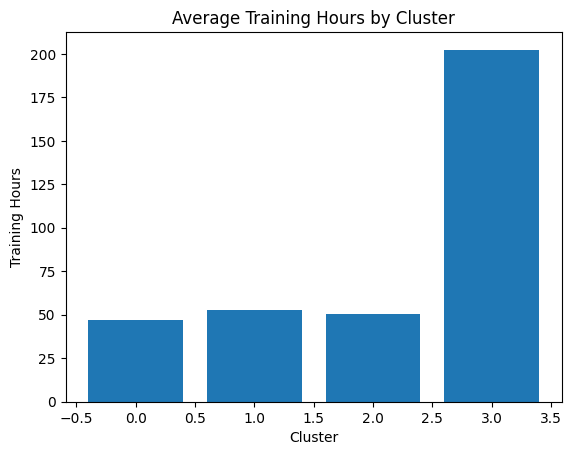

In [68]:
plt.figure()
plt.bar(cluster_summary['cluster'], cluster_summary['avg_training'])
plt.title('Average Training Hours by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Training Hours')
plt.show()

Plot:
- Bar chart of average training hours by cluster.

Findings:

The bar chart clearly shows a dramatic spike in average training hours for **Cluster 3** compared to the other three clusters:

* **Cluster 0**: \~47 hrs
* **Cluster 1**: \~53 hrs
* **Cluster 2**: \~51 hrs
* **Cluster 3**: \~202 hrs

Key Takeaways:

1. **Cluster 3’s Outlier Status**

   * This small group (\~1.9 k learners) is investing *4×* more hours in training than anyone else, yet their job-change rate (18.9%) remains near Cluster 0’s (18.2%).
   * **Action**: Audit content relevance—are they training in the right skills? Consider career-coaching or placement support to help translate effort into outcomes.

2. **Clusters 0, 1, 2 Are Bunched Around 50 hrs**

   * Despite similar training time (\~47–53 hrs), their mobility rates vary wildly (Cluster 1 at \~48.9% vs. Cluster 2 at \~14.3%).
   * **Cluster 1** (“sweet spot”): Moderate training in mid-tier cities drives nearly 50% mobility.
   * **Cluster 2** (veteran professionals): Deep experience (\~18 yrs) but low churn—likely looking for leadership roles rather than general upskilling.